In [1]:
import glob
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Display all the rows of a pandas data frame
pd.set_option("display.max_rows", None)

# Customize the pyplot figure
plt.rcParams.update(
    {"figure.figsize": (12, 9), "font.size": 15, "grid.linestyle": "dotted"}
)

# Get the pyplot default color cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Set telescope combination names
combo_names = {12: "LST1 + M1", 13: "LST1 + M2"}

# Get the paths to input data files

In [3]:
# ================
# === Settings ===
# ================

input_file_mask = (
    "/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/"
    "2.event_coincidence/data/coincidence/*Run03265.*.h5"
)

# ============
# === Main ===
# ============

input_files = glob.glob(input_file_mask)
input_files.sort()

print(f"{len(input_files)} files are found")

91 files are found


# Check the coincidence profiles

In [4]:
input_file = input_files[0]
print(f"Input file:\n{Path(input_file).name}")

features = pd.read_hdf(input_file, key="coincidence/feature")
profiles = pd.read_hdf(input_file, key="coincidence/profile")

Input file:
dl1_LST-1_MAGIC.Run03265.0004.h5


In [5]:
features

,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.608068e+09,0.699347,1.467619,0.699262,1.467630,-3.366571,1175,1492
1,13,300,1.608068e+09,0.699339,1.467615,0.699233,1.467627,-3.239849,1272,1627


In [6]:
profiles

,time_offset,n_coincidence_tel12,n_coincidence_btwn_tel12,n_coincidence_tel13,n_coincidence_btwn_tel13
0,-5.0,0,0,0,0
1,-4.9,0,0,0,0
2,-4.8,0,0,0,0
3,-4.7,0,0,1,1
4,-4.6,0,0,1,1
5,-4.5,0,0,1,1
6,-4.4,0,0,1,1
7,-4.3,0,0,1,1
8,-4.2,0,0,1,1
9,-4.1,0,0,1,0


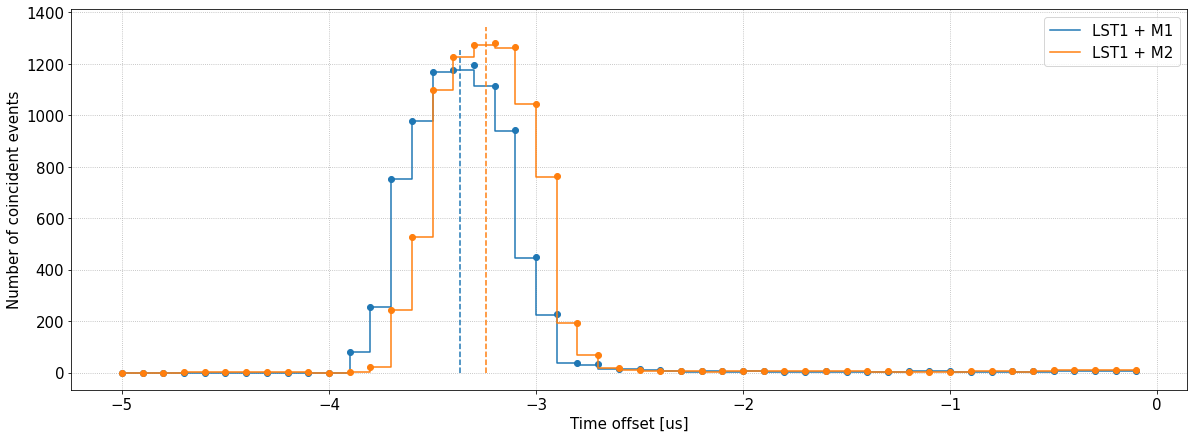

In [7]:
plt.figure(figsize=(20, 7))
plt.xlabel("Time offset [us]")
plt.ylabel("Number of coincident events")
plt.grid()

# Loop over every coincidence ID
coincidence_ids = features["coincidence_id"].to_numpy()

for i_combo, coinc_id in enumerate(coincidence_ids):

    # Plot the coincidence distribution
    plt.plot(
        profiles["time_offset"].to_numpy(),
        profiles[f"n_coincidence_tel{coinc_id}"].to_numpy(),
        linestyle="None",
        marker="o",
        color=colors[i_combo],
    )

    plt.step(
        profiles["time_offset"].to_numpy(),
        profiles[f"n_coincidence_btwn_tel{coinc_id}"].to_numpy(),
        where="post",
        color=colors[i_combo],
        label=combo_names[coinc_id],
    )

    # Plot the average offset
    df_features = features.query(f"coincidence_id == {coinc_id}")
    average_offset = df_features["average_offset"].to_numpy()[0]

    plt.plot(
        (average_offset, average_offset),
        (0, plt.ylim()[1]),
        linestyle="--",
        color=colors[i_combo],
    )

plt.legend()

# Check the coincidence performance

In [8]:
print("Loading the input files...")

data_list = []

for i_file, input_file in enumerate(input_files):

    if i_file % 10 == 0:
        print(f"{i_file}/{len(input_files)}")

    # Load the input file
    df = pd.read_hdf(input_file, key="coincidence/feature")
    data_list.append(df)

print(f"{i_file+1}/{len(input_files)}")

# Combine the data frames
features = pd.concat(data_list)

# Show the data frame
features.head()

Loading the input files...
0/91
10/91
20/91
30/91
40/91
50/91
60/91
70/91
80/91
90/91
91/91


,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.608068e+09,0.699347,1.467619,0.699262,1.467630,-3.366571,1175,1492
1,13,300,1.608068e+09,0.699339,1.467615,0.699233,1.467627,-3.239849,1272,1627
0,12,300,1.608068e+09,0.699874,1.467874,0.699789,1.467881,-3.366427,1171,1513
1,13,300,1.608068e+09,0.699876,1.467876,0.699777,1.467883,-3.238215,1261,1618
0,12,300,1.608068e+09,0.700434,1.468124,0.700365,1.468143,-3.362883,1223,1584


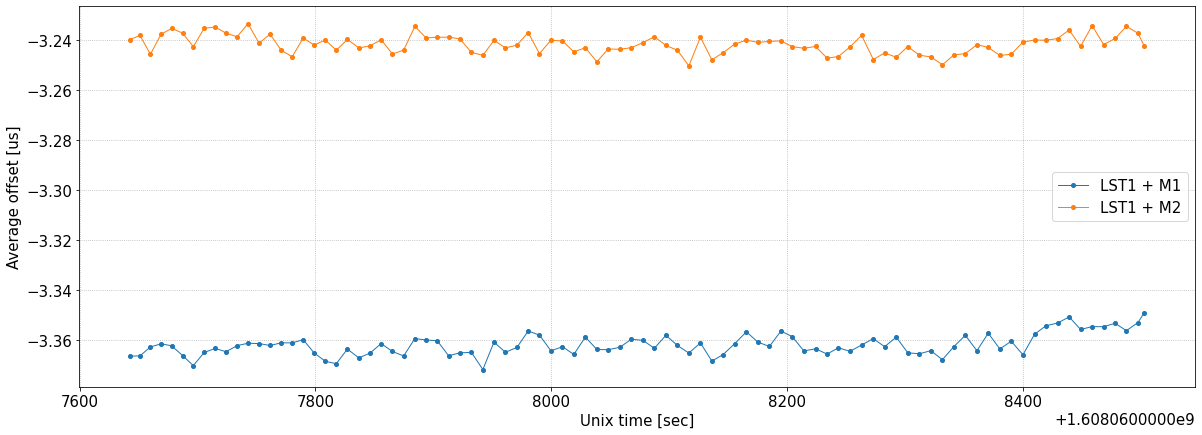

In [9]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Average offset [us]")
plt.grid()

# Loop over every coincidence ID
for coinc_id in coincidence_ids:

    df_features = features.query(f"coincidence_id == {coinc_id}")

    # Plot the average offset along the UNIX time
    plt.plot(
        df_features["unix_time"].to_numpy(),
        df_features["average_offset"].to_numpy(),
        marker="o",
        markersize=4,
        linewidth=1,
        label=combo_names[coinc_id],
    )

plt.legend()

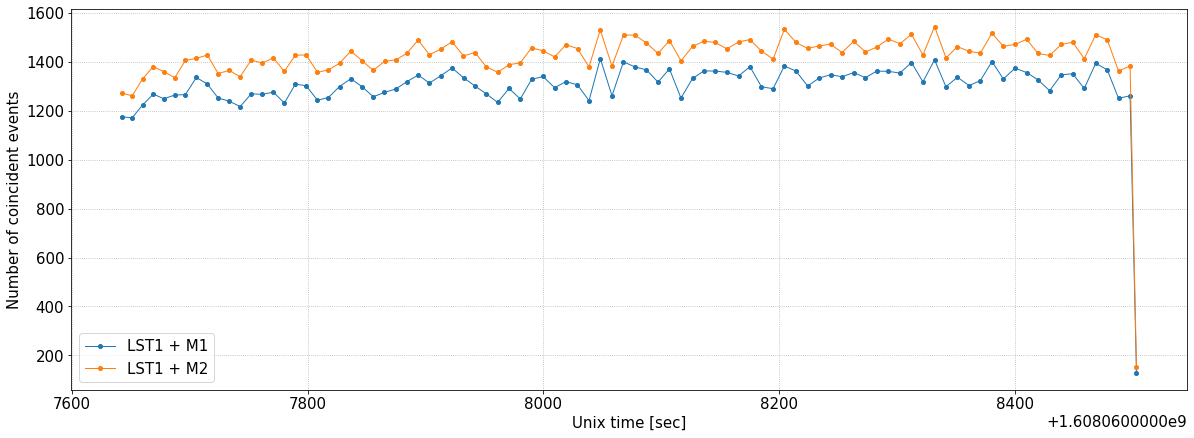

In [10]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Number of coincident events")
plt.grid()

# Loop over every coincidence ID
for coinc_id in coincidence_ids:

    df_features = features.query(f"coincidence_id == {coinc_id}")

    # Plot the number of coincident events along the UNIX time
    plt.plot(
        df_features["unix_time"].to_numpy(),
        df_features["n_coincidence"].to_numpy(),
        marker="o",
        markersize=4,
        linewidth=1,
        label=combo_names[coinc_id],
    )

plt.legend()

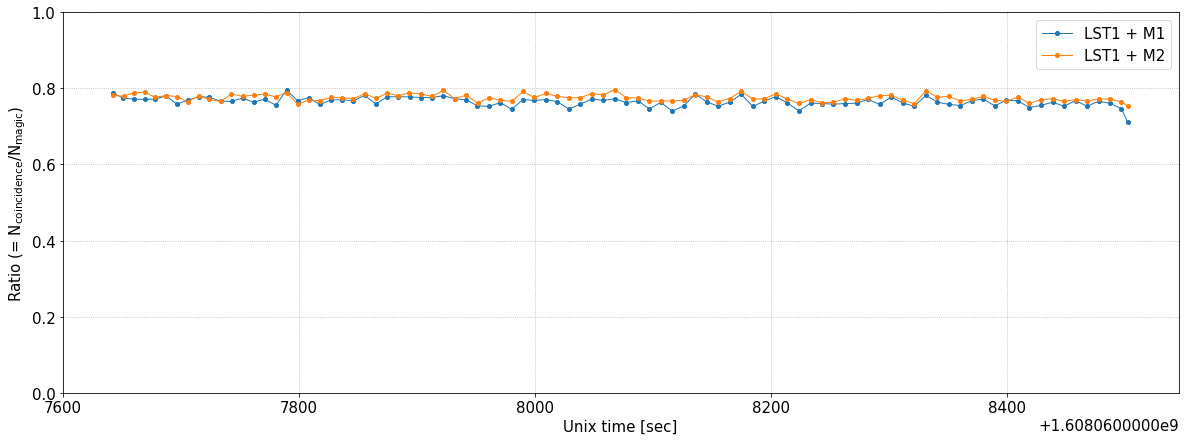

In [11]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Ratio (= N$_\mathrm{coincidence}$/N$_\mathrm{magic}$)")
plt.ylim(0, 1)
plt.grid()

# Loop over every coincidence ID
for coinc_id in coincidence_ids:

    df_features = features.query(f"coincidence_id == {coinc_id}")
    ratio = df_features["n_coincidence"] / df_features["n_events_magic"]

    # Plot the ratio (= N_coinc / N_magic) along the UNIX time
    plt.plot(
        df_features["unix_time"].to_numpy(),
        ratio.to_numpy(),
        marker="o",
        markersize=4,
        linewidth=1,
        label=combo_names[coinc_id],
    )

plt.legend()